Over/Under - Evaluating our Edge

    - In this notebook, we repeat the evaluation of the over/under model but with a larger test set

    - We will then do some simulations to see what kinds of profit we could expect (assuming our edge is real)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import structureboost as stb
import ml_insights as mli
import scipy as sp

pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)

In [2]:
df = pd.read_csv('df_bp9.csv', low_memory=False)

df_runs = pd.read_csv('df_runs_bp11.csv', low_memory=False)

In [3]:
df_runs['runs_trunc'] = np.minimum(df_runs['runs'],20)

In [4]:
# Let's modify this part to make the test set bigger

df_train = df_runs[(df_runs.season>2000) & (df_runs.season<=2017) & ~(df_runs.OBP_162.isnull())]
df_valid = df_runs[(df_runs.season>=2018) & (df_runs.season<=2018)]
df_test = df_runs[df_runs.season>=2019]

df_test_game = df[df.season>=2019]

BEGIN MODELING

In [5]:
df_runs.head()

,season,date,dblheader_code,date_dblhead,team_h,team_v,league_h,league_v,over_under_line,over_under_result,ballpark_id,day_night,runs,BATAVG_30,OBP_30,SLG_30,OBS_30,ERR_30,SB_30,CS_30,BATAVG_162,OBP_162,SLG_162,OBS_162,ERR_162,SB_162,CS_162,lineup8_BATAVG_10,lineup9_BATAVG_10,lineup8_BATAVG_10_w,lineup9_BATAVG_10_w,lineup8_OBP_10,lineup9_OBP_10,lineup8_OBP_10_w,lineup9_OBP_10_w,lineup8_SLG_10,lineup9_SLG_10,lineup8_SLG_10_w,lineup9_SLG_10_w,lineup8_OBS_10,lineup9_OBS_10,lineup8_OBS_10_w,lineup9_OBS_10_w,lineup8_SLGmod_10,lineup9_SLGmod_10,lineup8_SLGmod_10_w,lineup9_SLGmod_10_w,lineup8_SObat_perc_10,lineup9_SObat_perc_10,lineup8_SObat_perc_10_w,lineup9_SObat_perc_10_w,lineup8_BATAVG_30,lineup9_BATAVG_30,lineup8_BATAVG_30_w,lineup9_BATAVG_30_w,lineup8_OBP_30,lineup9_OBP_30,lineup8_OBP_30_w,lineup9_OBP_30_w,lineup8_SLG_30,lineup9_SLG_30,lineup8_SLG_30_w,lineup9_SLG_30_w,lineup8_OBS_30,lineup9_OBS_30,lineup8_OBS_30_w,lineup9_OBS_30_w,lineup8_SLGmod_30,lineup9_SLGmod_30,lineup8_SLGmod_30_w,lineup9_SLGmod_30_w,lineup8_SObat_perc_30,lineup9_SObat_perc_30,lineup8_SObat_perc_30_w,lineup9_SObat_perc_30_w,lineup8_BATAVG_81,lineup9_BATAVG_81,lineup8_BATAVG_81_w,lineup9_BATAVG_81_w,lineup8_OBP_81,lineup9_OBP_81,lineup8_OBP_81_w,lineup9_OBP_81_w,lineup8_SLG_81,lineup9_SLG_81,lineup8_SLG_81_w,lineup9_SLG_81_w,lineup8_OBS_81,lineup9_OBS_81,lineup8_OBS_81_w,lineup9_OBS_81_w,lineup8_SLGmod_81,lineup9_SLGmod_81,lineup8_SLGmod_81_w,lineup9_SLGmod_81_w,lineup8_SObat_perc_81,lineup9_SObat_perc_81,lineup8_SObat_perc_81_w,lineup9_SObat_perc_81_w,lineup8_BATAVG_162,lineup9_BATAVG_162,lineup8_BATAVG_162_w,lineup9_BATAVG_162_w,lineup8_OBP_162,lineup9_OBP_162,lineup8_OBP_162_w,lineup9_OBP_162_w,lineup8_SLG_162,lineup9_SLG_162,lineup8_SLG_162_w,lineup9_SLG_162_w,lineup8_OBS_162,lineup9_OBS_162,lineup8_OBS_162_w,lineup9_OBS_162_w,lineup8_SLGmod_162,lineup9_SLGmod_162,lineup8_SLGmod_162_w,lineup9_SLGmod_162_w,lineup8_SObat_perc_162,lineup9_SObat_perc_162,lineup8_SObat_perc_162_w,lineup9_SObat_perc_162_w,Strt_ERA_6,Strt_WHIP_6,Strt_SO_perc_6,Strt_H_BB_perc_6,Strt_TB_BB_perc_6,Strt_FIP_6,Strt_FIP_perc_6,Strt_ERA_15,Strt_WHIP_15,Strt_SO_perc_15,Strt_H_BB_perc_15,Strt_TB_BB_perc_15,Strt_FIP_15,Strt_FIP_perc_15,Strt_ERA_30,Strt_WHIP_30,Strt_SO_perc_30,Strt_H_BB_perc_30,Strt_TB_BB_perc_30,Strt_FIP_30,Strt_FIP_perc_30,Bpen_WHIP_10,Bpen_SO_perc_10,Bpen_H_BB_perc_10,Bpen_TB_BB_perc_10,Bpen_WHIP_30,Bpen_SO_perc_30,Bpen_H_BB_perc_30,Bpen_TB_BB_perc_30,Bpen_WHIP_162,Bpen_SO_perc_162,Bpen_H_BB_perc_162,Bpen_TB_BB_perc_162,home_hitting,runs_trunc
0,2000,20000329,0,200003290,NYN,CHN,NL,NL,0.0,NaN,TOK01,N,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.237860,0.251431,0.238568,0.250346,0.334452,0.344910,0.334292,0.343436,0.382455,0.384404,0.381870,0.383628,0.716907,0.729314,0.716162,0.727065,0.402844,0.389830,0.399184,0.388178,0.147286,0.146794,0.145588,0.145323,0.245549,0.254750,0.246067,0.254049,0.346180,0.352160,0.347118,0.352248,0.389000,0.397188,0.389727,0.396804,0.735181,0.749348,0.736845,0.749051,0.408938,0.412390,0.409787,0.412717,0.151145,0.158055,0.151315,0.157331,0.294249,0.291099,0.296043,0.293119,0.373477,0.369210,0.375677,0.371739,0.461612,0.448858,0.464532,0.453115,0.835089,0.818068,0.840209,0.824854,0.399125,0.396081,0.400460,0.397673,0.137912,0.145276,0.137494,0.143963,0.293784,0.283775,0.294884,0.286040,0.371615,0.363083,0.373521,0.365888,0.459983,0.437337,0.461734,0.441796,0.831597,0.800420,0.835255,0.807684,0.396236,0.394088,0.397373,0.395387,0.137939,0.148280,0.137354,0.146438,3.941606,0.919708,0.275862,0.241379,0.402299,2.364964,0.620690,4.942373,1.250847,0.243373,0.296386,0.472289,3.945763,0.934940,4.192833,1.366894,0.212515,0.315230,0.460449,4.121160,0.950413,1.50,0.200000,0.370000,0.450000,1.50,0.200000,0.370000,0.450000,1.500000,0.200000,0.370000,0.450000,1,3
1,2000,20000330,0,200003300,CHN,NYN,NL,NL,0.0,NaN,TOK01,N,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.255689,0.238390,0.254898,0.239873,0.348563,0.332056,0.349331

In [6]:
feat_set = ['OBP_162',
 'SLG_162',
 'Strt_WHIP_15',
 'Strt_TB_BB_perc_15',
 'Strt_H_BB_perc_15',
 'Strt_SO_perc_6',
 'Bpen_WHIP_162',
 'Bpen_TB_BB_perc_162',
 'Bpen_H_BB_perc_162',
 'Bpen_SO_perc_162',
 'Bpen_WHIP_30',
 'Bpen_TB_BB_perc_30',
 'Bpen_H_BB_perc_30',
 'Bpen_SO_perc_30',
 'Bpen_WHIP_10',
 'Bpen_TB_BB_perc_10',
 'Bpen_H_BB_perc_10',
 'Bpen_SO_perc_10',
 'lineup9_OBP_162',
 'lineup9_SLG_162',
 'home_hitting']

In [9]:
bpv2 = np.linspace(-.5,20.5,22)
bpv2

array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
       10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5])

In [10]:
df_runs['runs_trunc'] = np.minimum(df_runs['runs'],20)

In [11]:
# def try_features_runs(feat_set, max_depth=2):
target = 'runs_trunc'
X_train = df_train.loc[:,feat_set]
X_valid = df_valid.loc[:,feat_set]
X_test = df_test.loc[:,feat_set]

y_train = df_train[target].to_numpy()
y_valid = df_valid[target].to_numpy()
y_test = df_test[target].to_numpy()

In [12]:
cr1 = stb.Coarsage(num_trees = 1000, learning_rate=.02, max_depth=4,
                  binpt_method = 'fixed', 
               binpt_vec=bpv2)
cr1.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stop_past_steps=5, eval_freq=10)

i=0, eval_set_loss = 2.4589934685106396


i=10, eval_set_loss = 2.456185054605059
i=20, eval_set_loss = 2.4541400760618695
i=30, eval_set_loss = 2.4524927810850334
i=40, eval_set_loss = 2.45121096131038
i=50, eval_set_loss = 2.4503505204862512
i=60, eval_set_loss = 2.449642331681226
i=70, eval_set_loss = 2.449107680570686
i=80, eval_set_loss = 2.448702896769477
i=90, eval_set_loss = 2.448375191455054
i=100, eval_set_loss = 2.4482818868349288
i=110, eval_set_loss = 2.4481469491978136
i=120, eval_set_loss = 2.4480504594695653
i=130, eval_set_loss = 2.4479503129256655
i=140, eval_set_loss = 2.447974531861903
i=150, eval_set_loss = 2.4481087084750537
i=160, eval_set_loss = 2.4481192565929075
i=170, eval_set_loss = 2.448126633026896
i=180, eval_set_loss = 2.4480894065544208
Stopping early: low pt was 5 steps ago


In [13]:
preds_test = cr1.predict_distributions(X_test)

In [14]:
preds_test.log_loss(y_test)

2.463915047197437

Predicting the Over / Under

    - As a first step, we will model the total score as an independent sum of the two scores

    - For baseball, this is not a terrible assumption (would be worse in other sports)

    - Still, would expect some imperfection, since teams make strategic decisions based on the score of the game

        - Play for one run in a close game
        
        - Put a rookie pitcher in with a big lead

In [15]:
def probs_oup_val(probvec_a, probvec_b, val, ties_go_over=True):
    # given two probability distributions and the ou-line, returns prob of under
    val_up = int(np.ceil(val))
    val_down = int(np.floor(val))
    cdf_b = np.cumsum(probvec_b)
    prob_under = 0
    prob_push = 0
    if (val_down<val_up): # This means we have a decimal (.5) o/u value - no pushes      
        for i in range(0, val_down+1):
            # calculate prob that we are less than or equal to val_down for each
            # value of probvec_a between 0 and val_down
            prob_under += probvec_a[i] * cdf_b[val_down-i]
        return(1-prob_under-prob_push, prob_under, prob_push)
    else: # This means val_down == val_up == val and we have an integer line so pushes are possible
        for i in range(0, val_down):
            # calculate prob that we are less than or equal to val_down-1 for each
            # value of probvec_a between 0 and val_down
            prob_under += probvec_a[i] * cdf_b[val_down-1-i]
        for j in range(0, val_down+1):
            # calculate prob that we are exactly = val_down
            if (not ties_go_over) or (j != val_down-j): # if line is 10 and predicts score of 5-5, maybe count as over
                prob_push += probvec_a[j] * probvec_b[val_down-j] 
        return(1-prob_under-prob_push, prob_under,  prob_push)

In [16]:
num_games_test=int(df_test.shape[0]/2)

In [17]:
oup_probs = np.array([probs_oup_val(preds_test[i].probvec, preds_test[i+num_games_test].probvec, df_test.over_under_line.iloc[i])
                        for i in range(num_games_test)])

In [18]:
oup_probs[:5,:]

array([[0.39081159, 0.52074419, 0.08844422],
       [0.44698834, 0.55301166, 0.        ],
       [0.40145552, 0.59854448, 0.        ],
       [0.52691569, 0.3737563 , 0.09932802],
       [0.55295413, 0.44704587, 0.        ]])

In [19]:
oup_probs.mean(axis=0)

array([0.43358345, 0.52661414, 0.03980241])

In [20]:
df_test.over_under_result.value_counts().sum(), df_test.over_under_result.value_counts()/df_test.over_under_result.value_counts().sum()

(21224,
 U    0.482190
 O    0.471447
 P    0.046363
 Name: over_under_result, dtype: float64)

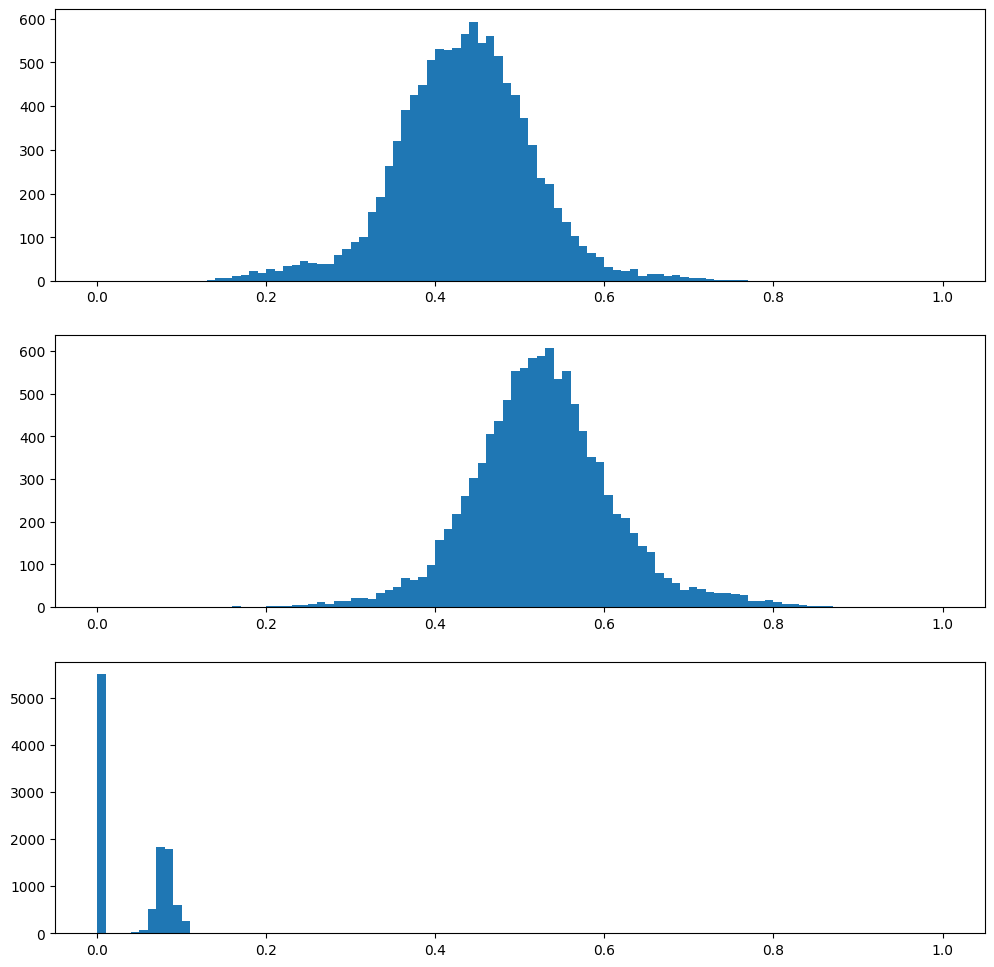

In [21]:
plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
plt.hist(oup_probs[:,0], np.linspace(0,1,101));
plt.subplot(3,1,2)
plt.hist(oup_probs[:,1], np.linspace(0,1,101));
plt.subplot(3,1,3)
plt.hist(oup_probs[:,2], np.linspace(0,1,101));

In [22]:
def evaluate_edge_probs(oupmat, edge, test_df_w_ouline):
    bet_under = (oupmat[:,1]/(oupmat[:,0] + oupmat[:,1])) > (.5 + edge)
    bet_over = (oupmat[:,0]/(oupmat[:,0] + oupmat[:,1])) > (.5 + edge)
    num_cases_under = np.sum(bet_under)
    num_cases_over = np.sum(bet_over)
    num_cases_total = num_cases_under + num_cases_over
    num_under_correct = (test_df_w_ouline.loc[bet_under,'over_under_result']=='U').sum()
    num_under_push = (test_df_w_ouline.loc[bet_under,'over_under_result']=='P').sum()
    num_over_correct = (test_df_w_ouline.loc[bet_over,'over_under_result']=='O').sum()
    num_over_push = (test_df_w_ouline.loc[bet_over,'over_under_result']=='P').sum()
    num_correct = num_under_correct + num_over_correct
    num_pushes = num_under_push + num_over_push
    num_incorrect = num_cases_total -num_correct - num_pushes
    pct_correct = num_correct / num_cases_total
    pct_pushes = num_pushes / num_cases_total
    pct_incorrect = num_incorrect / num_cases_total
    pct_under_correct = num_under_correct/num_cases_under
    pct_under_push = num_under_push/num_cases_under
    pct_over_correct = num_over_correct/num_cases_over
    pct_over_push = num_over_push/num_cases_over
    print(f'\nThere were {num_cases_total} games that met criteria of edge > {edge} ({num_cases_under} unders and {num_cases_over} overs)')
    print(f'Of them {num_correct} ({np.round(pct_correct,3)}) were correct (winning bets), ({num_under_correct} unders and {num_over_correct} overs) ')
    print(f'and {num_pushes} ({np.round(pct_pushes,3)}) were Pushes ({num_under_push} unders and {num_over_push} overs)')
    print(f'and {num_incorrect} ({np.round(pct_incorrect,3)}) were incorrect (losing bets))')
    winning_edge_m110 = pct_correct*1 + pct_incorrect*(-1.1)
    win_total_m110 = num_correct*1 + num_incorrect*(-1.1)
    print(f'Betting the Under at a line of -110, your profit would have been {np.round(winning_edge_m110,4)} per bet')
    print(f'\t for a total profit of {np.round(win_total_m110,2)} across all {num_cases_total} bets')
    print('\n')

In [23]:
for i in np.linspace(.25, .05,5):
    print(f'threshold = {i}')
    evaluate_edge_probs(oup_probs, i, df_test_game)

threshold = 0.25

There were 232 games that met criteria of edge > 0.25 (218 unders and 14 overs)
Of them 119 (0.513) were correct (winning bets), (113 unders and 6 overs) 
and 7 (0.03) were Pushes (5 unders and 2 overs)
and 106 (0.457) were incorrect (losing bets))
Betting the Under at a line of -110, your profit would have been 0.0103 per bet
	 for a total profit of 2.4 across all 232 bets


threshold = 0.2

There were 479 games that met criteria of edge > 0.2 (427 unders and 52 overs)
Of them 255 (0.532) were correct (winning bets), (226 unders and 29 overs) 
and 18 (0.038) were Pushes (13 unders and 5 overs)
and 206 (0.43) were incorrect (losing bets))
Betting the Under at a line of -110, your profit would have been 0.0593 per bet
	 for a total profit of 28.4 across all 479 bets


threshold = 0.15

There were 1089 games that met criteria of edge > 0.15 (950 unders and 139 overs)
Of them 540 (0.496) were correct (winning bets), (473 unders and 67 overs) 
and 38 (0.035) were Pushes (

In [24]:
def evaluate_lkratio(nc, ni, null_prob, alt_prob):
    null_lk = sp.stats.binom.pmf(nc,nc+ni,null_prob)
    alt_lk = sp.stats.binom.pmf(nc,nc+ni,alt_prob)
    return(alt_lk/null_lk)

In [25]:
evaluate_lkratio(119, 106, .5, 119/(119+106))

1.4561045975113125

In [27]:
evaluate_lkratio(255, 206, .5, 255/(255+206))

13.586099884137598

In [28]:
evaluate_lkratio(540, 511, .5, 540/(540+511))

1.4920424191046426

In [29]:
evaluate_lkratio(1345, 1331, .5, 1345/(1345+1331))

1.037300837333335

In [28]:
def_prob = 0.482333/(0.482333+0.468639)
def_prob

0.5072000016824891

In [29]:
evaluate_lkratio(194, 148, def_prob, 194/(194+148))

11.893349273289573

In [30]:
mid_prob = (def_prob+(194/(194+148)))/2
mid_prob

0.5372257318353966

In [31]:
194/(194+148)

0.5672514619883041

In [32]:
evaluate_lkratio(194, 148, def_prob, mid_prob)

6.3830074888225825

Let's simulate the future

    - Assume we can be "right" 56.7% of the time

    - How much can we expect to make betting for an entire season?

    - How likely is it that we would lose money?

In [30]:
df_test_game.season.value_counts()

2022    2430
2019    2429
2023    2429
2021    2426
2020     898
Name: season, dtype: int64

In [31]:
pct_games_to_bet = 362/16358
num_games_in_season = 2430
pct_games_to_bet, pct_games_to_bet*num_games_in_season

(0.022129844724293923, 53.77552268003423)

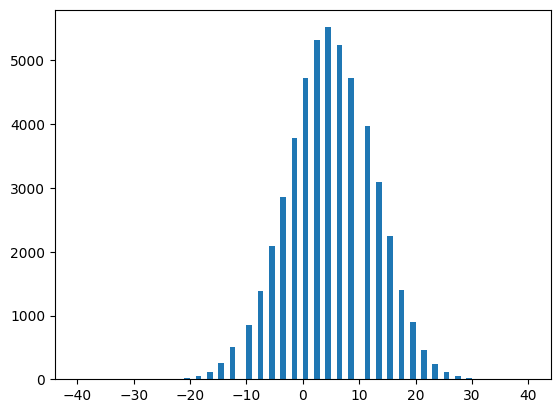

In [32]:
num_games_bet = 53
betting_wins = np.random.binomial(n=num_games_bet, p=.567, size=50000)
betting_losses = num_games_bet-betting_wins
amount_won = betting_wins -1.1*betting_losses
plt.hist(amount_won, np.linspace(-40,40,81));

In [33]:
np.mean(amount_won<0)

0.23878

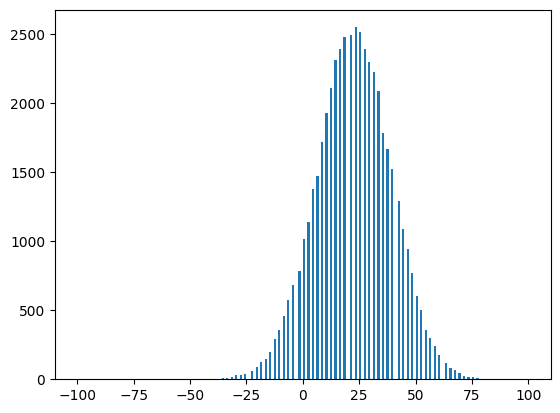

In [34]:
num_games_bet = 250
betting_wins = np.random.binomial(n=num_games_bet, p=.567, size=50000)
betting_losses = num_games_bet-betting_wins
amount_won = betting_wins -1.1*betting_losses
plt.hist(amount_won, np.linspace(-100,100,201));

In [35]:
np.mean(amount_won<0)

0.07786

Conclusions

    - Profit is small relative to the amounts bet

    - Even with edge, still reasonable chance of losing money!

    - Good news - this was our first stab at a model! Lots of ways to improve

    - Bad news - potential that this model could be off (rule changes, etc)

Possible Next Steps

    - Explore calibration / validity of team level run-prediction

    - Build model for Under/Over/Push rather than relying on independence assumption (make features out of the probability distributions)

    - Generally improve runs scored model (feature selection, hyper-parameter tuning, etc.)

    - Use the runs scored model to develop features for predicting the winner (against moneyline)

    - Predict run "differential" and use that to predict winner (against moneyline)

    - See if runs scored models can help us bet on the spread (like point spreads in football)